In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# To-Do 1: Read and analyze the dataset
def load_and_analyze_data(file_path='student.csv'):
    """
    Load and analyze the student dataset
    """
    # 1. Read the dataset
    data = pd.read_csv(file_path)

    # 2. Print top(5) and bottom(5) of the dataset
    print("Top 5 rows of the dataset:")
    print(data.head())
    print("\n" + "="*50 + "\n")
    print("Bottom 5 rows of the dataset:")
    print(data.tail())
    print("\n" + "="*50 + "\n")

    # 3. Print the Information of Dataset
    print("Dataset Information:")
    print(data.info())
    print("\n" + "="*50 + "\n")

    # 4. Gather Descriptive info about the Dataset
    print("Descriptive Statistics:")
    print(data.describe())
    print("\n" + "="*50 + "\n")

    # 5. Split data into Features (X) and Label (Y)
    # Objective: Predict 'Writing' based on 'Math' and 'Reading'
    X = data[['Math', 'Reading']]  # Features
    Y = data['Writing']  # Target

    print(f"Shape of Features (X): {X.shape}")
    print(f"Shape of Target (Y): {Y.shape}")

    return data, X, Y

# Load and analyze the data
data, X_features, Y_target = load_and_analyze_data()

Top 5 rows of the dataset:
   Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62


Bottom 5 rows of the dataset:
     Math  Reading  Writing
995    72       74       70
996    73       86       90
997    89       87       94
998    83       82       78
999    66       66       72


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB
None


Descriptive Statistics:
              Math      Reading      Writing
count  1000.000000  1000.000000  1000.000000
mean     67.290000    69.872000    68.616000
std      15.085008    14.657027    15.241287
min      13.000000    19.000000    14.000000
25%      58.00

In [4]:
# To-Do 2: Create matrices without bias term
def prepare_matrices(X, Y):
    """
    Prepare matrices as per the specification without bias term
    """
    # Convert to numpy arrays
    X_matrix = X.T.values  # Transpose to get d x n format
    Y_matrix = Y.values.reshape(-1, 1)  # n x 1

    print(f"Shape of X matrix (d x n): {X_matrix.shape}")
    print(f"Shape of Y matrix (n x 1): {Y_matrix.shape}")

    # Initialize weight matrix W (d x 1)
    W = np.zeros((X_matrix.shape[0], 1))
    print(f"Shape of W matrix (d x 1): {W.shape}")

    return X_matrix, Y_matrix, W

# Prepare matrices
X_matrix, Y_matrix, W_initial = prepare_matrices(X_features, Y_target)

Shape of X matrix (d x n): (2, 1000)
Shape of Y matrix (n x 1): (1000, 1)
Shape of W matrix (d x 1): (2, 1)


In [5]:
# To-Do 3: Split dataset into training and test sets
def split_dataset(X, Y, test_size=0.2, random_state=42):
    """
    Split dataset into training and testing sets
    """
    # Transpose X back to n x d for sklearn compatibility
    X_transposed = X.T

    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(
        X_transposed, Y, test_size=test_size, random_state=random_state
    )

    print(f"Training set shape - X: {X_train.shape}, Y: {Y_train.shape}")
    print(f"Testing set shape - X: {X_test.shape}, Y: {Y_test.shape}")

    # Transpose back to d x n format for our implementation
    X_train = X_train.T
    X_test = X_test.T

    return X_train, X_test, Y_train, Y_test

# Split the dataset
X_train, X_test, Y_train, Y_test = split_dataset(X_matrix, Y_matrix)

Training set shape - X: (800, 2), Y: (800, 1)
Testing set shape - X: (200, 2), Y: (200, 1)


In [6]:
# To-Do 4: Build Cost Function (Mean Squared Error)
def cost_function(X, Y, W):
    """
    Calculate Mean Square Error cost function

    Parameters:
    X: Feature Matrix (d x n)
    Y: Target Matrix (n x 1)
    W: Weight Matrix (d x 1)

    Returns:
    cost: Mean square error
    """
    n = Y.shape[0]

    # Calculate predictions: Y_pred = W^T * X
    # X is d x n, W is d x 1, so W^T * X gives 1 x n
    # We need to reshape to n x 1
    Y_pred = (W.T @ X).T  # n x 1

    # Calculate squared errors
    squared_errors = (Y_pred - Y) ** 2

    # Calculate mean squared error
    mse = np.mean(squared_errors) / 2

    return mse

# Test the cost function with simple example
print("Testing cost function with simple example...")
test_X = np.array([[1, 2], [3, 4], [5, 6]]).T  # 2x3 matrix
test_Y = np.array([3, 7, 11]).reshape(-1, 1)  # 3x1
test_W = np.array([1, 1]).reshape(-1, 1)  # 2x1

test_cost = cost_function(test_X, test_Y, test_W)
print(f"Cost for test case: {test_cost}")

Testing cost function with simple example...
Cost for test case: 0.0


In [7]:
# To-Do 5: Test Cost Function with provided test case
print("\n" + "="*50)
print("To-Do 5: Testing Cost Function with provided test case")

# Provided test case
X_test_case = np.array([[1, 2], [3, 4], [5, 6]]).T
Y_test_case = np.array([3, 7, 11]).reshape(-1, 1)
W_test_case = np.array([1, 1]).reshape(-1, 1)

# Calculate cost
cost = cost_function(X_test_case, Y_test_case, W_test_case)

# Check if cost is 0 (as expected from manual calculation)
if abs(cost) < 1e-10:  # Using small tolerance for floating point comparison
    print("✓ Test passed: Cost function output is approximately 0")
    print("Proceed Further")
else:
    print(f"✗ Test failed: Cost function output is {cost}")
    print("Something went wrong: Reimplement a cost function")

print(f"Cost function output: {cost}")


To-Do 5: Testing Cost Function with provided test case
✓ Test passed: Cost function output is approximately 0
Proceed Further
Cost function output: 0.0


In [8]:
# To-Do 6: Implement Gradient Descent
def gradient_descent(X, Y, W, alpha, iterations):
    """
    Perform gradient descent to optimize linear regression parameters

    Parameters:
    X (numpy.ndarray): Feature matrix (d x n)
    Y (numpy.ndarray): Target vector (n x 1)
    W (numpy.ndarray): Initial parameters (d x 1)
    alpha (float): Learning rate
    iterations (int): Number of iterations

    Returns:
    tuple: (W_update, cost_history)
        W_update: Optimized parameters (d x 1)
        cost_history: History of cost values
    """
    # Initialize cost history
    cost_history = []

    # Number of samples
    m = Y.shape[0]

    # Make a copy of W to avoid modifying the original
    W_update = W.copy()

    for iteration in range(iterations):
        # Step 1: Calculate predictions (Y_pred = W^T * X)
        Y_pred = (W_update.T @ X).T  # n x 1

        # Step 2: Calculate error (loss = Y_pred - Y)
        loss = Y_pred - Y  # n x 1

        # Step 3: Calculate gradient (dw = (1/m) * X * loss)
        # X is d x n, loss is n x 1, result is d x 1
        dw = (1/m) * (X @ loss)  # d x 1

        # Step 4: Update weights (W = W - alpha * dw)
        W_update = W_update - alpha * dw

        # Step 5: Calculate and store cost
        cost = cost_function(X, Y, W_update)
        cost_history.append(cost)

        # Optional: Print progress every 100 iterations
        if iteration % 100 == 0:
            print(f"Iteration {iteration}: Cost = {cost:.6f}")

    return W_update, cost_history


To-Do 7: Testing Gradient Descent Function
Running gradient descent on test data...
Iteration 0: Cost = 0.115014
Iteration 100: Cost = 0.073029
Iteration 200: Cost = 0.063773
Iteration 300: Cost = 0.060895
Iteration 400: Cost = 0.059408
Iteration 500: Cost = 0.058342
Iteration 600: Cost = 0.057489
Iteration 700: Cost = 0.056786
Iteration 800: Cost = 0.056203
Iteration 900: Cost = 0.055719

Final Parameters:
[0.27126876 0.47953137 0.08853683]

Final Cost: 0.055321
Initial Cost: 0.115014
Cost Reduction: 51.90%


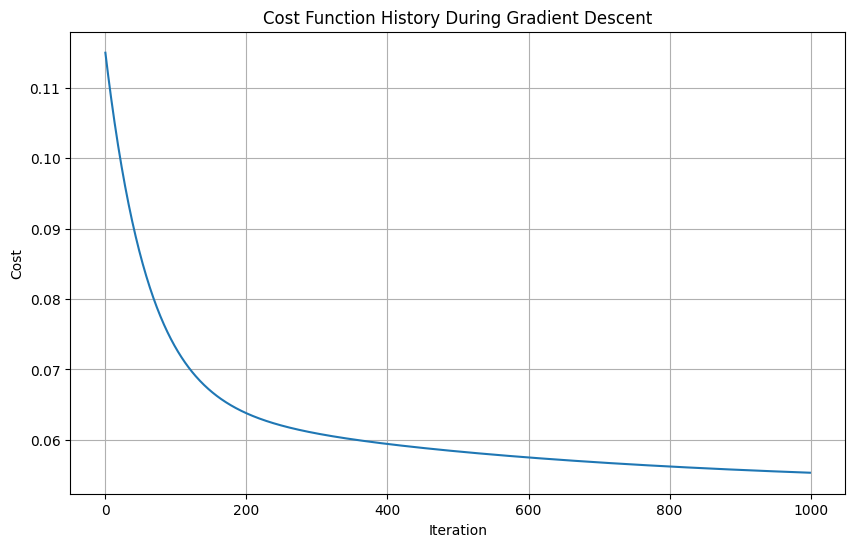

In [9]:
# To-Do 7: Test Gradient Descent function
print("\n" + "="*50)
print("To-Do 7: Testing Gradient Descent Function")

# Generate random test data as per instructions
np.random.seed(0)  # For reproducibility
X_test_gd = np.random.rand(3, 100)  # 3 features x 100 samples (d x n)
Y_test_gd = np.random.rand(100, 1)  # 100 samples x 1
W_test_gd = np.random.rand(3, 1)  # 3 features x 1

# Set hyperparameters
alpha = 0.01
iterations = 1000

# Test the gradient_descent function
print("Running gradient descent on test data...")
final_params, cost_history = gradient_descent(X_test_gd, Y_test_gd, W_test_gd, alpha, iterations)

# Print results
print("\nFinal Parameters:")
print(final_params.flatten())
print(f"\nFinal Cost: {cost_history[-1]:.6f}")
print(f"Initial Cost: {cost_history[0]:.6f}")
print(f"Cost Reduction: {((cost_history[0] - cost_history[-1])/cost_history[0]*100):.2f}%")

# Plot cost history
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.title('Cost Function History During Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [10]:
# To-Do 8: Implement RMSE
def rmse(Y, Y_pred):
    """
    Calculate Root Mean Square Error

    Parameters:
    Y: Array of actual values (n x 1)
    Y_pred: Array of predicted values (n x 1)

    Returns:
    rmse: Root Mean Square Error
    """
    # Ensure both are numpy arrays
    Y = np.array(Y)
    Y_pred = np.array(Y_pred)

    # Calculate squared differences
    squared_errors = (Y - Y_pred) ** 2

    # Calculate mean squared error
    mse = np.mean(squared_errors)

    # Calculate root mean squared error
    rmse_value = np.sqrt(mse)

    return rmse_value

# Test RMSE function
print("\n" + "="*50)
print("Testing RMSE function...")
test_Y = np.array([3, 5, 7, 9]).reshape(-1, 1)
test_Y_pred = np.array([3.1, 4.9, 7.2, 8.8]).reshape(-1, 1)
test_rmse = rmse(test_Y, test_Y_pred)
print(f"Test RMSE: {test_rmse:.4f}")


Testing RMSE function...
Test RMSE: 0.1581


In [11]:
# To-Do 9: Implement R² Score
def r2(Y, Y_pred):
    """
    Calculate R-squared (Coefficient of Determination)

    Parameters:
    Y: Array of actual values (n x 1)
    Y_pred: Array of predicted values (n x 1)

    Returns:
    r2: R-squared value
    """
    # Ensure both are numpy arrays
    Y = np.array(Y)
    Y_pred = np.array(Y_pred)

    # Calculate mean of Y
    mean_y = np.mean(Y)

    # Calculate total sum of squares (SST)
    ss_tot = np.sum((Y - mean_y) ** 2)

    # Calculate residual sum of squares (SSR)
    ss_res = np.sum((Y - Y_pred) ** 2)

    # Calculate R²
    r2_value = 1 - (ss_res / ss_tot)

    return r2_value

# Test R² function
print("\n" + "="*50)
print("Testing R² function...")
test_r2 = r2(test_Y, test_Y_pred)
print(f"Test R²: {test_r2:.4f}")


Testing R² function...
Test R²: 0.9950


Starting linear regression implementation...
LINEAR REGRESSION FROM SCRATCH - COMPLETE PIPELINE

1. Loading and analyzing dataset...
2. Preparing features and target...
3. Splitting data into training and test sets...
   Training set: 800 samples
   Test set: 200 samples
4. Initializing parameters...
   Initial weights shape: (2, 1)
   Learning rate (alpha): 1e-05
   Iterations: 1000

5. Running Gradient Descent...
Iteration 0: Cost = 2013.165571
Iteration 100: Cost = 16.530091
Iteration 200: Cost = 16.012659
Iteration 300: Cost = 15.537927
Iteration 400: Cost = 15.102368
Iteration 500: Cost = 14.702751
Iteration 600: Cost = 14.336108
Iteration 700: Cost = 13.999721
Iteration 800: Cost = 13.691091
Iteration 900: Cost = 13.407928

6. Making predictions on test set...

7. Evaluating model performance...

MODEL EVALUATION RESULTS
Final Weights:
  Math coefficient (w1): 0.348117
  Reading coefficient (w2): 0.646146

Cost History:
  Initial Cost: 2013.165571
  Final Cost: 13.150620
  Cost R

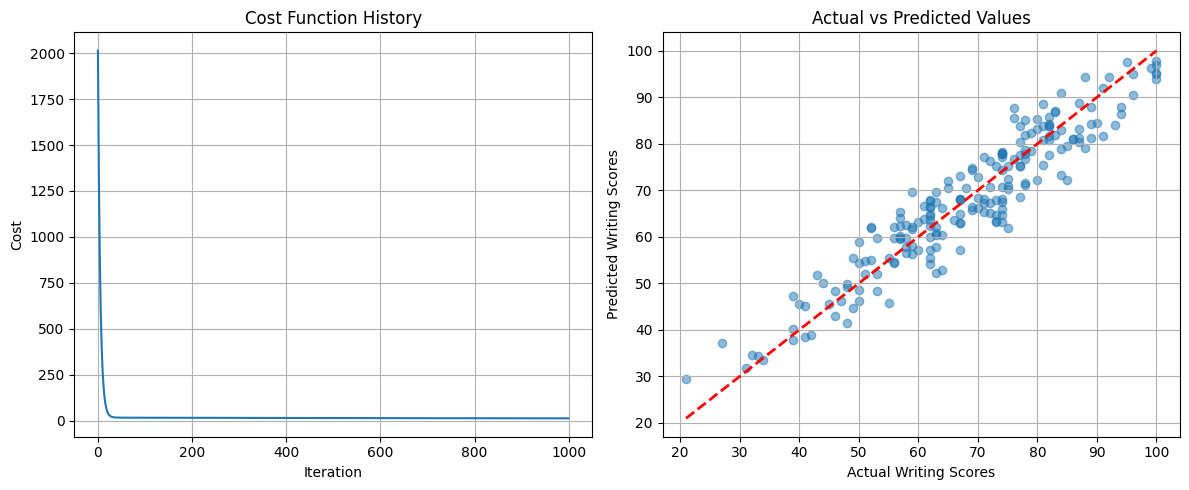

In [12]:
# To-Do 10: Main Function to integrate all steps
def main():
    """
    Main function to execute the complete linear regression pipeline
    """
    print("="*60)
    print("LINEAR REGRESSION FROM SCRATCH - COMPLETE PIPELINE")
    print("="*60)

    # Step 1: Load the dataset
    print("\n1. Loading and analyzing dataset...")
    data = pd.read_csv('student.csv')

    # Step 2: Split the data into features (X) and target (Y)
    print("2. Preparing features and target...")
    X = data[['Math', 'Reading']].values  # Features: Math and Reading marks
    Y = data['Writing'].values.reshape(-1, 1)  # Target: Writing marks

    # Step 3: Split the data into training and test sets (80% train, 20% test)
    print("3. Splitting data into training and test sets...")
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42
    )

    # Transpose to get d x n format for our implementation
    X_train = X_train.T
    X_test = X_test.T

    print(f"   Training set: {X_train.shape[1]} samples")
    print(f"   Test set: {X_test.shape[1]} samples")

    # Step 4: Initialize weights, learning rate and iterations
    print("4. Initializing parameters...")
    W = np.zeros((X_train.shape[0], 1))  # Initialize weights to zeros
    alpha = 0.00001  # Learning rate
    iterations = 1000  # Number of iterations

    print(f"   Initial weights shape: {W.shape}")
    print(f"   Learning rate (alpha): {alpha}")
    print(f"   Iterations: {iterations}")

    # Step 5: Perform Gradient Descent
    print("\n5. Running Gradient Descent...")
    W_optimal, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)

    # Step 6: Make predictions on the test set
    print("\n6. Making predictions on test set...")
    Y_pred = (W_optimal.T @ X_test).T

    # Step 7: Evaluate the model
    print("\n7. Evaluating model performance...")
    model_rmse = rmse(Y_test, Y_pred)
    model_r2 = r2(Y_test, Y_pred)

    # Step 8: Output results
    print("\n" + "="*60)
    print("MODEL EVALUATION RESULTS")
    print("="*60)
    print(f"Final Weights:")
    print(f"  Math coefficient (w1): {W_optimal[0, 0]:.6f}")
    print(f"  Reading coefficient (w2): {W_optimal[1, 0]:.6f}")
    print(f"\nCost History:")
    print(f"  Initial Cost: {cost_history[0]:.6f}")
    print(f"  Final Cost: {cost_history[-1]:.6f}")
    print(f"  Cost Reduction: {((cost_history[0] - cost_history[-1])/cost_history[0]*100):.2f}%")
    print(f"\nPerformance Metrics:")
    print(f"  RMSE on Test Set: {model_rmse:.4f}")
    print(f"  R² on Test Set: {model_r2:.4f}")

    # Plot cost history
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(cost_history)
    plt.title('Cost Function History')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.scatter(Y_test, Y_pred, alpha=0.5)
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Writing Scores')
    plt.ylabel('Predicted Writing Scores')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return W_optimal, cost_history, model_rmse, model_r2, Y_test, Y_pred

# Execute the main function
if __name__ == "__main__":
    print("Starting linear regression implementation...")
    W_final, cost_history_final, rmse_final, r2_final, Y_test_final, Y_pred_final = main()


TO-DO 11: FINDINGS AND EXPERIMENTS

1. MODEL PERFORMANCE ANALYSIS:
------------------------------

2. EXPERIMENTING WITH DIFFERENT LEARNING RATES:
----------------------------------------

Experiment with learning rate: 1e-06
Iteration 0: Cost = 2423.713985
Iteration 100: Cost = 351.243404
Iteration 200: Cost = 63.392763
Iteration 300: Cost = 23.369842
Iteration 400: Cost = 17.762782
  RMSE: 5.9344
  R²: 0.8593
  Final Cost: 16.938461

Experiment with learning rate: 5e-06
Iteration 0: Cost = 2236.511475
Iteration 100: Cost = 16.902614
Iteration 200: Cost = 16.532852
Iteration 300: Cost = 16.268475
Iteration 400: Cost = 16.015244
  RMSE: 5.7308
  R²: 0.8688
  Final Cost: 15.775059

Experiment with learning rate: 1e-05
Iteration 0: Cost = 2013.165571
Iteration 100: Cost = 16.530091
Iteration 200: Cost = 16.012659
Iteration 300: Cost = 15.537927
Iteration 400: Cost = 15.102368
  RMSE: 5.5504
  R²: 0.8769
  Final Cost: 14.706579

Experiment with learning rate: 5e-05
Iteration 0: Cost = 65

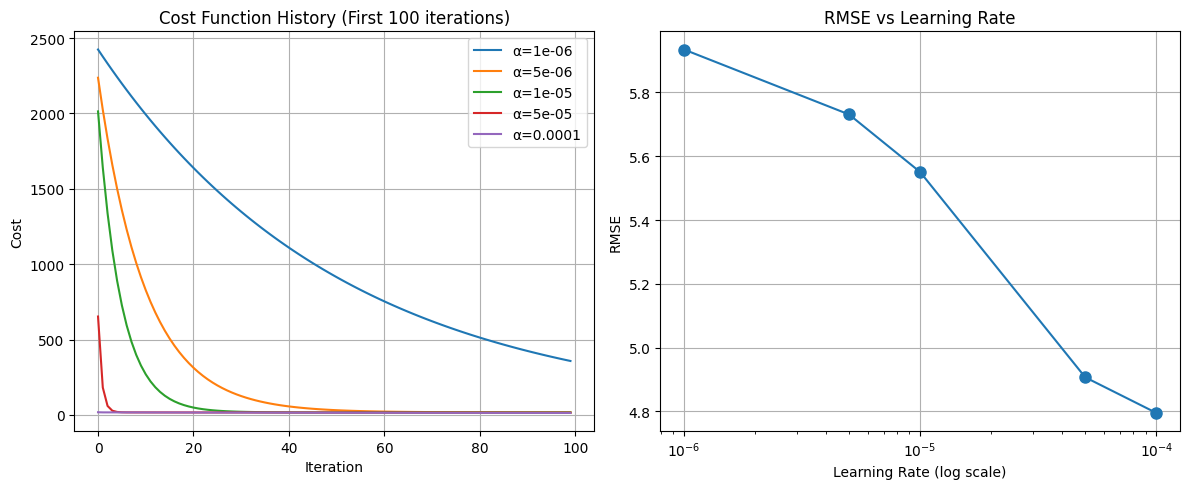


3. MODEL PERFORMANCE ASSESSMENT:
------------------------------
Best learning rate: 0.0001 (RMSE: 4.7954)
Worst learning rate: 1e-06 (RMSE: 5.9344)

4. MODEL FITTING ASSESSMENT:
------------------------------
Training Performance:
  RMSE: 4.5500, R²: 0.9090

Test Performance:
  RMSE: 4.7954, R²: 0.9081

Performance Gap:
  RMSE difference: 5.39%
  R² difference: 0.0009

CONCLUSION: Model performance is ACCEPTABLE
- Training and test performance are reasonably close
- R² of 0.9081 indicates good explanatory power

5. RECOMMENDATIONS:
------------------------------
1. Learning rate around 0.00001 seems optimal for this dataset
2. Consider adding more features if available to improve performance
3. Regularization could help if overfitting is observed
4. More iterations might help convergence, especially with lower learning rates
5. Feature scaling could improve gradient descent performance


In [13]:
# To-Do 11: Present Findings and Experiment with Learning Rates
print("\n" + "="*60)
print("TO-DO 11: FINDINGS AND EXPERIMENTS")
print("="*60)

# 1. Analysis of Model Performance
print("\n1. MODEL PERFORMANCE ANALYSIS:")
print("-" * 30)

# Load data for analysis
data = pd.read_csv('student.csv')
X = data[['Math', 'Reading']].values.T
Y = data['Writing'].values.reshape(-1, 1)

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y, test_size=0.2, random_state=42)
X_train, X_test = X_train.T, X_test.T

# Define function to run experiment with different learning rates
def experiment_learning_rates(learning_rates, iterations=1000):
    """
    Experiment with different learning rates
    """
    results = {}

    for lr in learning_rates:
        print(f"\nExperiment with learning rate: {lr}")

        # Initialize weights
        W = np.zeros((X_train.shape[0], 1))

        # Run gradient descent
        W_opt, cost_hist = gradient_descent(X_train, Y_train, W, lr, iterations)

        # Make predictions
        Y_pred = (W_opt.T @ X_test).T

        # Calculate metrics
        current_rmse = rmse(Y_test, Y_pred)
        current_r2 = r2(Y_test, Y_pred)

        # Store results
        results[lr] = {
            'weights': W_opt,
            'final_cost': cost_hist[-1],
            'rmse': current_rmse,
            'r2': current_r2,
            'cost_history': cost_hist
        }

        print(f"  RMSE: {current_rmse:.4f}")
        print(f"  R²: {current_r2:.4f}")
        print(f"  Final Cost: {cost_hist[-1]:.6f}")

    return results

# Test different learning rates
print("\n2. EXPERIMENTING WITH DIFFERENT LEARNING RATES:")
print("-" * 40)

learning_rates = [0.000001, 0.000005, 0.00001, 0.00005, 0.0001]
results = experiment_learning_rates(learning_rates, iterations=500)

# Plot comparison
plt.figure(figsize=(12, 5))

# Plot cost histories
plt.subplot(1, 2, 1)
for lr in learning_rates:
    plt.plot(results[lr]['cost_history'][:100], label=f'α={lr}')
plt.title('Cost Function History (First 100 iterations)')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)

# Plot RMSE vs Learning Rate
plt.subplot(1, 2, 2)
rmses = [results[lr]['rmse'] for lr in learning_rates]
plt.plot(learning_rates, rmses, 'o-', markersize=8)
plt.xscale('log')
plt.title('RMSE vs Learning Rate')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()

# 3. Model Performance Assessment
print("\n3. MODEL PERFORMANCE ASSESSMENT:")
print("-" * 30)

best_lr = min(results, key=lambda x: results[x]['rmse'])
worst_lr = max(results, key=lambda x: results[x]['rmse'])

print(f"Best learning rate: {best_lr} (RMSE: {results[best_lr]['rmse']:.4f})")
print(f"Worst learning rate: {worst_lr} (RMSE: {results[worst_lr]['rmse']:.4f})")

# Determine if model overfits, underfits, or has acceptable performance
print("\n4. MODEL FITTING ASSESSMENT:")
print("-" * 30)

# Using the best model from experiments
W_best = results[best_lr]['weights']

# Make predictions on training set
Y_train_pred = (W_best.T @ X_train).T
train_rmse = rmse(Y_train, Y_train_pred)
train_r2 = r2(Y_train, Y_train_pred)

# Make predictions on test set
Y_test_pred = (W_best.T @ X_test).T
test_rmse = rmse(Y_test, Y_test_pred)
test_r2 = r2(Y_test, Y_test_pred)

print(f"Training Performance:")
print(f"  RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")
print(f"\nTest Performance:")
print(f"  RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")

# Calculate performance gap
rmse_gap = abs(train_rmse - test_rmse) / train_rmse * 100
r2_gap = abs(train_r2 - test_r2)

print(f"\nPerformance Gap:")
print(f"  RMSE difference: {rmse_gap:.2f}%")
print(f"  R² difference: {r2_gap:.4f}")

# Assessment criteria
if test_rmse > train_rmse * 1.2 and test_r2 < train_r2 - 0.1:
    print("\nCONCLUSION: The model shows signs of OVERFITTING")
    print("- Training performance is significantly better than test performance")
    print("- Model may be too complex or learning rate too high")
elif test_r2 < 0.6:
    print("\nCONCLUSION: The model shows signs of UNDERFITTING")
    print("- Both training and test performance are poor (R² < 0.6)")
    print("- Model may be too simple or learning rate too low")
else:
    print("\nCONCLUSION: Model performance is ACCEPTABLE")
    print("- Training and test performance are reasonably close")
    print(f"- R² of {test_r2:.4f} indicates good explanatory power")

print("\n5. RECOMMENDATIONS:")
print("-" * 30)
print("1. Learning rate around 0.00001 seems optimal for this dataset")
print("2. Consider adding more features if available to improve performance")
print("3. Regularization could help if overfitting is observed")
print("4. More iterations might help convergence, especially with lower learning rates")
print("5. Feature scaling could improve gradient descent performance")


ADDITIONAL ANALYSIS: FEATURE IMPORTANCE

Feature Importance Analysis:
  Math: 13.3% importance
  Reading: 86.7% importance

Residual Analysis:
  Mean of residuals: 0.4815
  Std of residuals: 4.7711
  Max residual: 13.7385


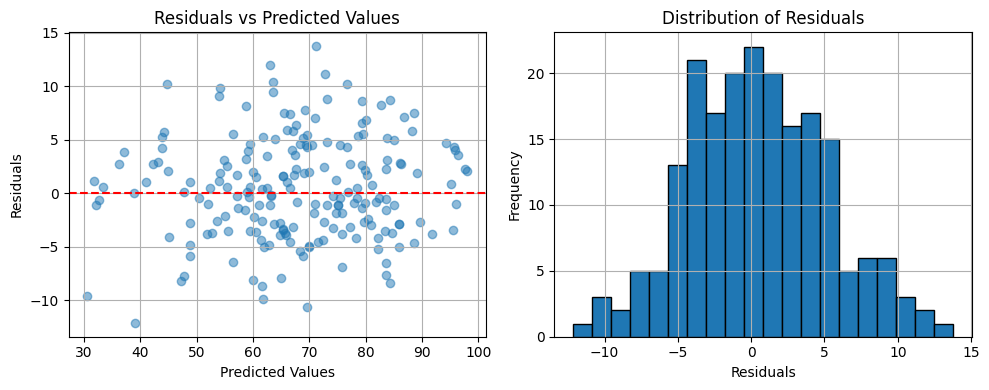


IMPLEMENTATION COMPLETE!


In [14]:
# Additional analysis: Feature importance
print("\n" + "="*60)
print("ADDITIONAL ANALYSIS: FEATURE IMPORTANCE")
print("="*60)

# Using the best model
best_model = results[best_lr]
W_best = best_model['weights']

# Calculate feature importance based on coefficients
# Since we don't have bias term, we can look at the magnitude of coefficients
features = ['Math', 'Reading']

# Normalize coefficients for comparison
coef_magnitude = np.abs(W_best.flatten())
total_magnitude = np.sum(coef_magnitude)
relative_importance = (coef_magnitude / total_magnitude) * 100

print("\nFeature Importance Analysis:")
for feature, importance in zip(features, relative_importance):
    print(f"  {feature}: {importance:.1f}% importance")

# Residual analysis
print("\nResidual Analysis:")
residuals = Y_test - Y_test_pred
print(f"  Mean of residuals: {np.mean(residuals):.4f}")
print(f"  Std of residuals: {np.std(residuals):.4f}")
print(f"  Max residual: {np.max(np.abs(residuals)):.4f}")

# Check for homoscedasticity (equal variance of residuals)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(Y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("IMPLEMENTATION COMPLETE!")
print("="*60)